In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import json


#let's try and make a list of my categories
# 1) read in train annotations JSON
# 2) convert dictionary to a list of classes
# 3) give that to the confusion matrix for clarity

#starting point: df with my cropped instances
#this had to be moved from my WSL to my SSH (with chatgpt's help)
#this will not automatically update if I change it in WSL
#Jan 23: I cannot figure out how to get the updated csv accessible on the SSH
# df = pd.read_csv('/home/Kathryn/code/ct_classifier/data/cropped_instances.csv')
# print(df)

#now let's make an alphabetical list of spp categories
#huzzah, it worked!
# species_list = sorted(df['spp'].unique())

#but I can move it manually
species_list_grouped = ['aardvark',
'bird',
'bushbuck',
'civet',
'duiker_spp',
'eland_hartebeest',
'elephant',
'genet',
'hare',
'hippo_buffalo_wildebeest',
'honey_badger',
'impala',
'kudu',
'lion',
'mongoose_spp',
'nyala',
'oribi',
'pangolin',
'pig',
'porcupine',
'primate',
'reedbuck',
'reptile',
'rodent',
'sable_antelope',
'serval',
'unknown_antelope',
'waterbuck']

dict_group_num_match = {g:i for i,g in enumerate(species_list_grouped)}
print(species_list_grouped)

class_label_map = {
        'baboon' : 'primate',
        'bird_other' : 'bird',
        'buffalo' : 'hippo_buffalo_wildebeest',
        'bushbaby' : 'primate',
        'bushpig' : 'pig',
        'eland' : 'eland_hartebeest',
        'ground_hornbill' : 'bird',
        'guineafowl_crested' : 'bird',
        'guineafowl_helmeted' : 'bird',
        'hartebeest' : 'eland_hartebeest',
        'hippo' : 'hippo_buffalo_wildebeest',
        'mongoose_banded' : 'mongoose_spp',
        'mongoose_bushy_tailed' : 'mongoose_spp',
        'mongoose_dwarf' : 'mongoose_spp',
        'mongoose_large_grey' : 'mongoose_spp',
        'mongoose_marsh' : 'mongoose_spp',
        'mongoose_other' : 'mongoose_spp',
        'mongoose_slender' : 'mongoose_spp',
        'mongoose_unknown' : 'mongoose_spp',
        'mongoose_white_tailed' : 'mongoose_spp',
        'monitor_lizard' : 'reptile',
        'samango' : 'primate',
        'vervet' : 'primate',
        'warthog' : 'pig',
        'wildebeest' : 'hippo_buffalo_wildebeest',
        'snake' : 'reptile',
        'lizard' : 'reptile',
        'duiker_unknown' : 'duiker_spp',
        'duiker_red' : 'duiker_spp',
        'duiker_common' : 'duiker_spp'
    }

['aardvark', 'bird', 'bushbuck', 'civet', 'duiker_spp', 'eland_hartebeest', 'elephant', 'genet', 'hare', 'hippo_buffalo_wildebeest', 'honey_badger', 'impala', 'kudu', 'lion', 'mongoose_spp', 'nyala', 'oribi', 'pangolin', 'pig', 'porcupine', 'primate', 'reedbuck', 'reptile', 'rodent', 'sable_antelope', 'serval', 'unknown_antelope', 'waterbuck']


/mnt/class_data/group4/katie/processed/eccv_18_annotation_files/cis_val_annotations_spp.json
aardvark -> aardvark
baboon -> primate
bird_other -> bird
buffalo -> hippo_buffalo_wildebeest
bushbaby -> primate
bushbuck -> bushbuck
bushpig -> pig
civet -> civet
duiker_common -> duiker_spp
duiker_red -> duiker_spp
duiker_unknown -> duiker_spp
eland -> eland_hartebeest
elephant -> elephant
genet -> genet
ground_hornbill -> bird
guineafowl_crested -> bird
guineafowl_helmeted -> bird
hare -> hare
hartebeest -> eland_hartebeest
hippo -> hippo_buffalo_wildebeest
honey_badger -> honey_badger
impala -> impala
kudu -> kudu
lion -> lion
lizard -> reptile
mongoose_banded -> mongoose_spp
mongoose_bushy_tailed -> mongoose_spp
mongoose_dwarf -> mongoose_spp
mongoose_large_grey -> mongoose_spp
mongoose_marsh -> mongoose_spp
mongoose_other -> mongoose_spp
mongoose_slender -> mongoose_spp
mongoose_unknown -> mongoose_spp
mongoose_white_tailed -> mongoose_spp
monitor_lizard -> reptile
nyala -> nyala
oribi -

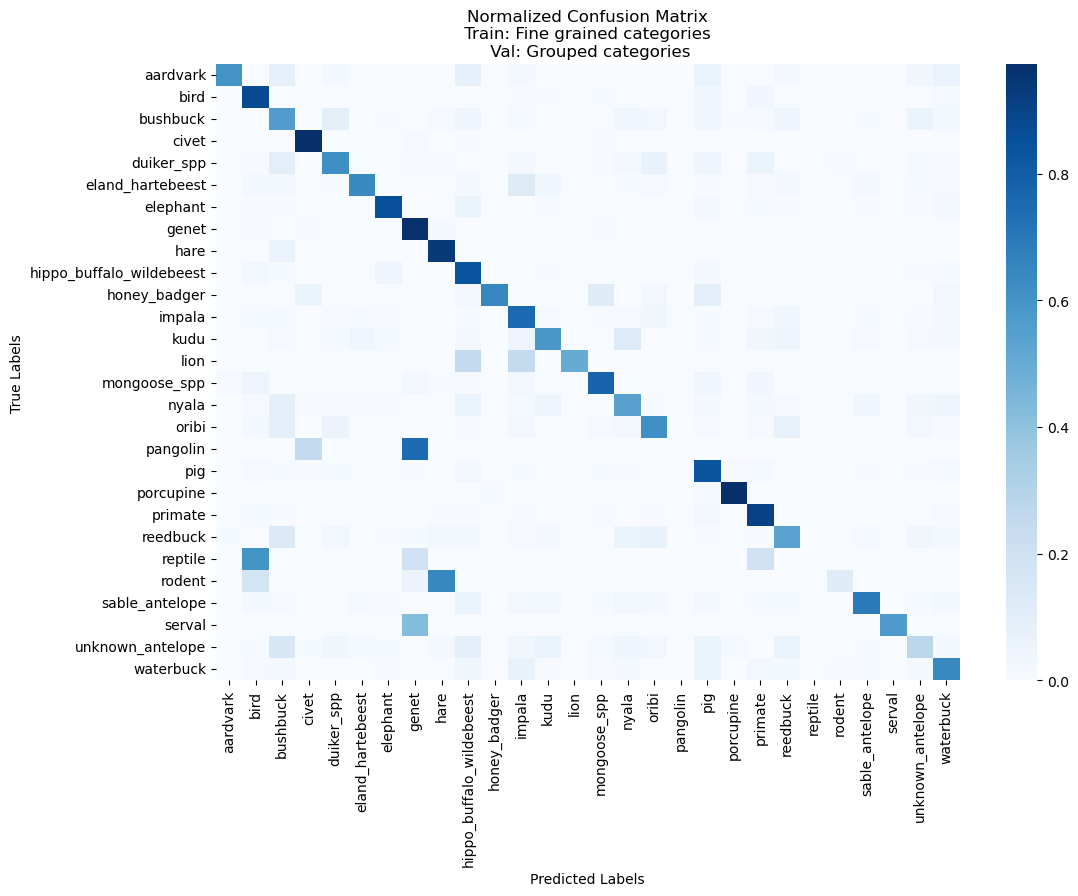

In [4]:
#let's make a confusion matrix from the results csv

root_path = '/home/Kathryn/code/ct_classifier/model_states-2025-01-17_21-39-55'

#read in csv
df = pd.read_csv(f'{root_path}/results.csv')
# print(df)


# lets read in our categories
import yaml

# Reading the YAML file
with open(f'{root_path}/config.yaml', 'r') as file:
    cfg = yaml.safe_load(file)
data_root = cfg['data_root']
val_annotations_filename = "cis_val_annotations_spp.json"


json_fpath = f"{data_root}/eccv_18_annotation_files/{val_annotations_filename}"

# Now 'config' will be a Python dictionary containing the YAML data
print(json_fpath)

# Load the JSON file
import json
with open(json_fpath, 'r') as file:
    data = json.load(file)
id_cat_dict = {}
for category in data.get('categories'):
    print(f"{category['name']} -> {class_label_map.get(category['name'], category['name'])}")

    id_cat_dict[category['id']] = class_label_map.get(category['name'], category['name'])
print(f"id_cat_dict : {id_cat_dict}")
    
# Adding new columns with mapped labels
#this has category names instead of index, with predicted and true values
df['pred_label'] = df['pred'].map(id_cat_dict)
df['true_label'] = df['true'].map(id_cat_dict)


print("df.head()")
print(df.head())

print(df['true'])
# #Let's work on a confusion matrix - I think we can I think we can
y_true = (df['true_label']).values
y_pred = (df['pred_label']).values
print(y_true[:5])

y_true = [dict_group_num_match[y] for y in y_true]
y_pred = [dict_group_num_match[y] for y in y_pred]

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_true)
print(f"{acc=}")
# dict_group_num_match
# # Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
fig, ax = plt.subplots(figsize=(12,8))
#plt.figure(figsize=(12, 8))
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', 
            xticklabels=species_list_grouped, yticklabels=species_list_grouped,ax=ax) 

# Titles and labels
ax.set_title('Normalized Confusion Matrix\n Train: Fine grained categories \n Val: Grouped categories')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Show the plot
# plt.show()
# plt.draw()

# print(plt.gcf()) 

plot_fname = "confusion_matrix_grouped_finegraintogrouped.png"  # Change format as needed (e.g., .pdf)
plot_filepath = os.path.join(root_path, plot_fname)
fig.savefig(plot_filepath) #this function gives you control over how this is saved, ie can save it higher quality
#^can manually set DPI, for example

# Close the figure to free up memory
#plt.close(fig)

# # plt.savefig(f'{root_path}/confusion_matrix.png')  # You can change the file format to .pdf, .jpg, etc.
# plt.close()  

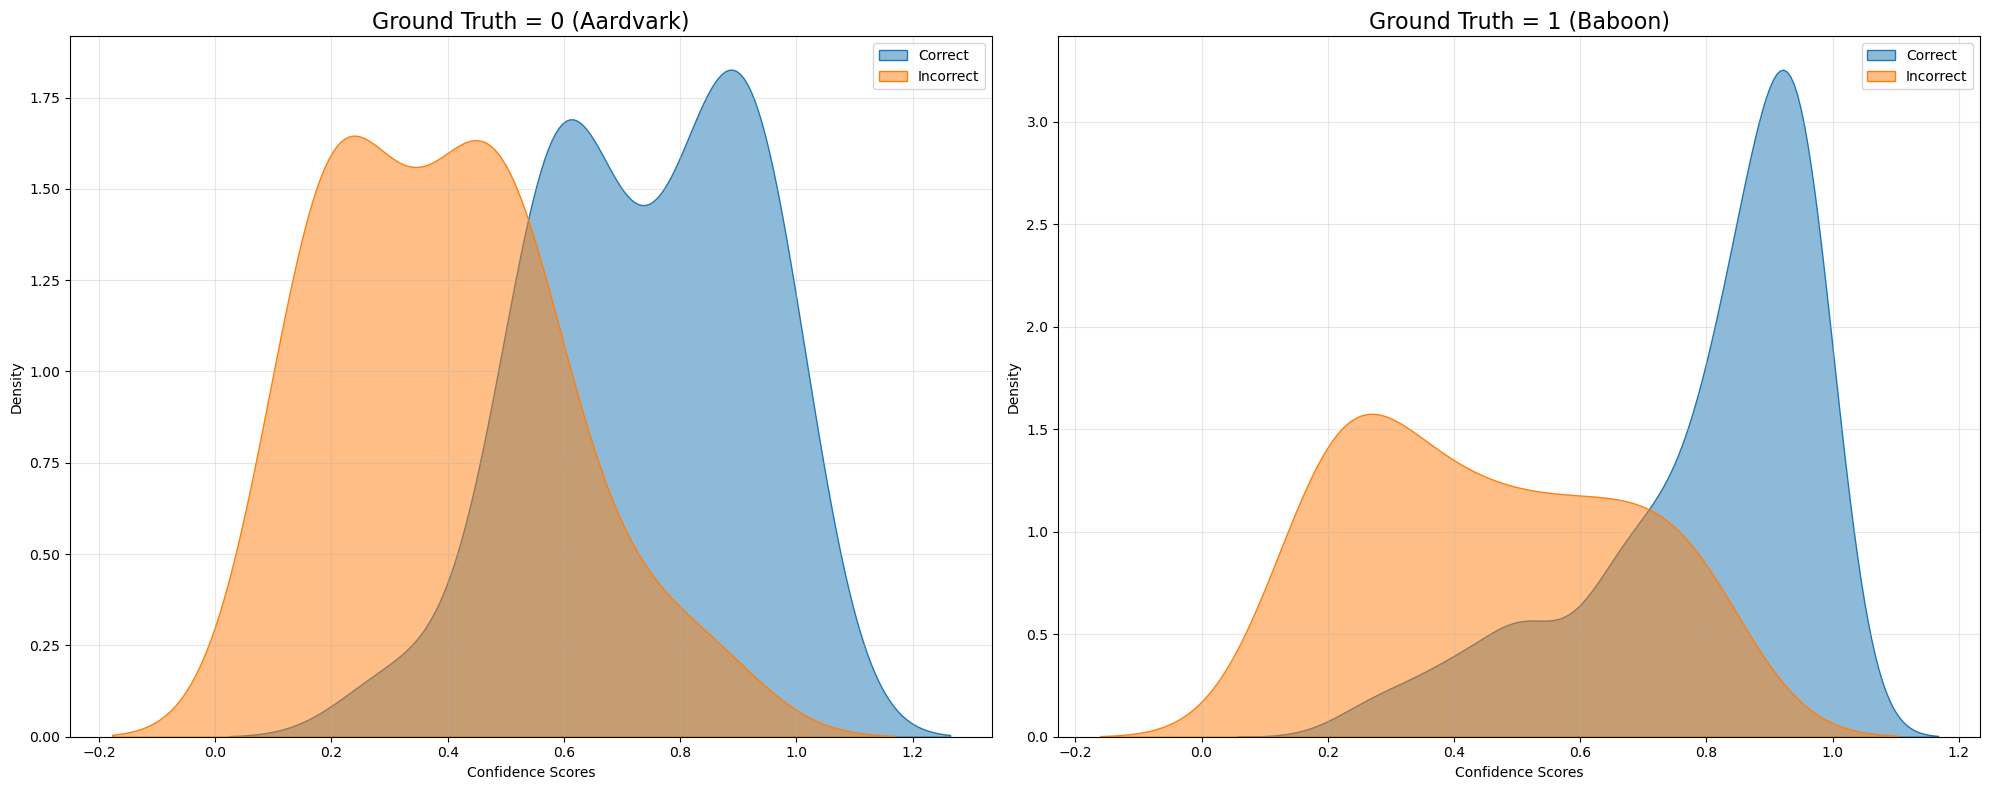

In [33]:
#okay I would like to create a histogram, this is code from Talen
#my df is the same setup as his
#there's something about this that Peter recommends changing, he's thinking about it
#this code writes density plots

# Create figure with two panels (1-row, 2-columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Panel 1: ground_truth = 0 [let's try for category 0 - baboons - just to start]
data_gt0 = df[df['true'] == 0]
correct_gt0 = data_gt0[data_gt0['true'] == data_gt0['pred']]['conf']
incorrect_gt0 = data_gt0[data_gt0['true'] != data_gt0['pred']]['conf']
sns.kdeplot(data=correct_gt0, fill=True, alpha=0.5, label='Correct', ax=ax1)
sns.kdeplot(data=incorrect_gt0, fill=True, alpha=0.5, label='Incorrect', ax=ax1)
ax1.set_title('Ground Truth = 0 (Aardvark)', fontsize=16)
ax1.set_xlabel('Confidence Scores')
ax1.set_ylabel('Density')
ax1.grid(True, alpha=0.3)
ax1.legend()

#  Panel 2: ground_truth = 1 [and let's try for category 1 just to start]
data_gt1 = df[df['true'] == 1]
correct_gt1 = data_gt1[data_gt1['true'] == data_gt1['pred']]['conf']
incorrect_gt1 = data_gt1[data_gt1['true'] != data_gt1['pred']]['conf']
sns.kdeplot(data=correct_gt1, fill=True, alpha=0.5, label='Correct', ax=ax2)
sns.kdeplot(data=incorrect_gt1, fill=True, alpha=0.5, label='Incorrect', ax=ax2)
ax2.set_title('Ground Truth = 1 (Baboon)', fontsize=16)
ax2.set_xlabel('Confidence Scores')
ax2.set_ylabel('Density')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.show()

fig.savefig(f'{root_path}/density_hist_finegraintogrouped.png')  # You can change the file format to .pdf, .jpg, etc.


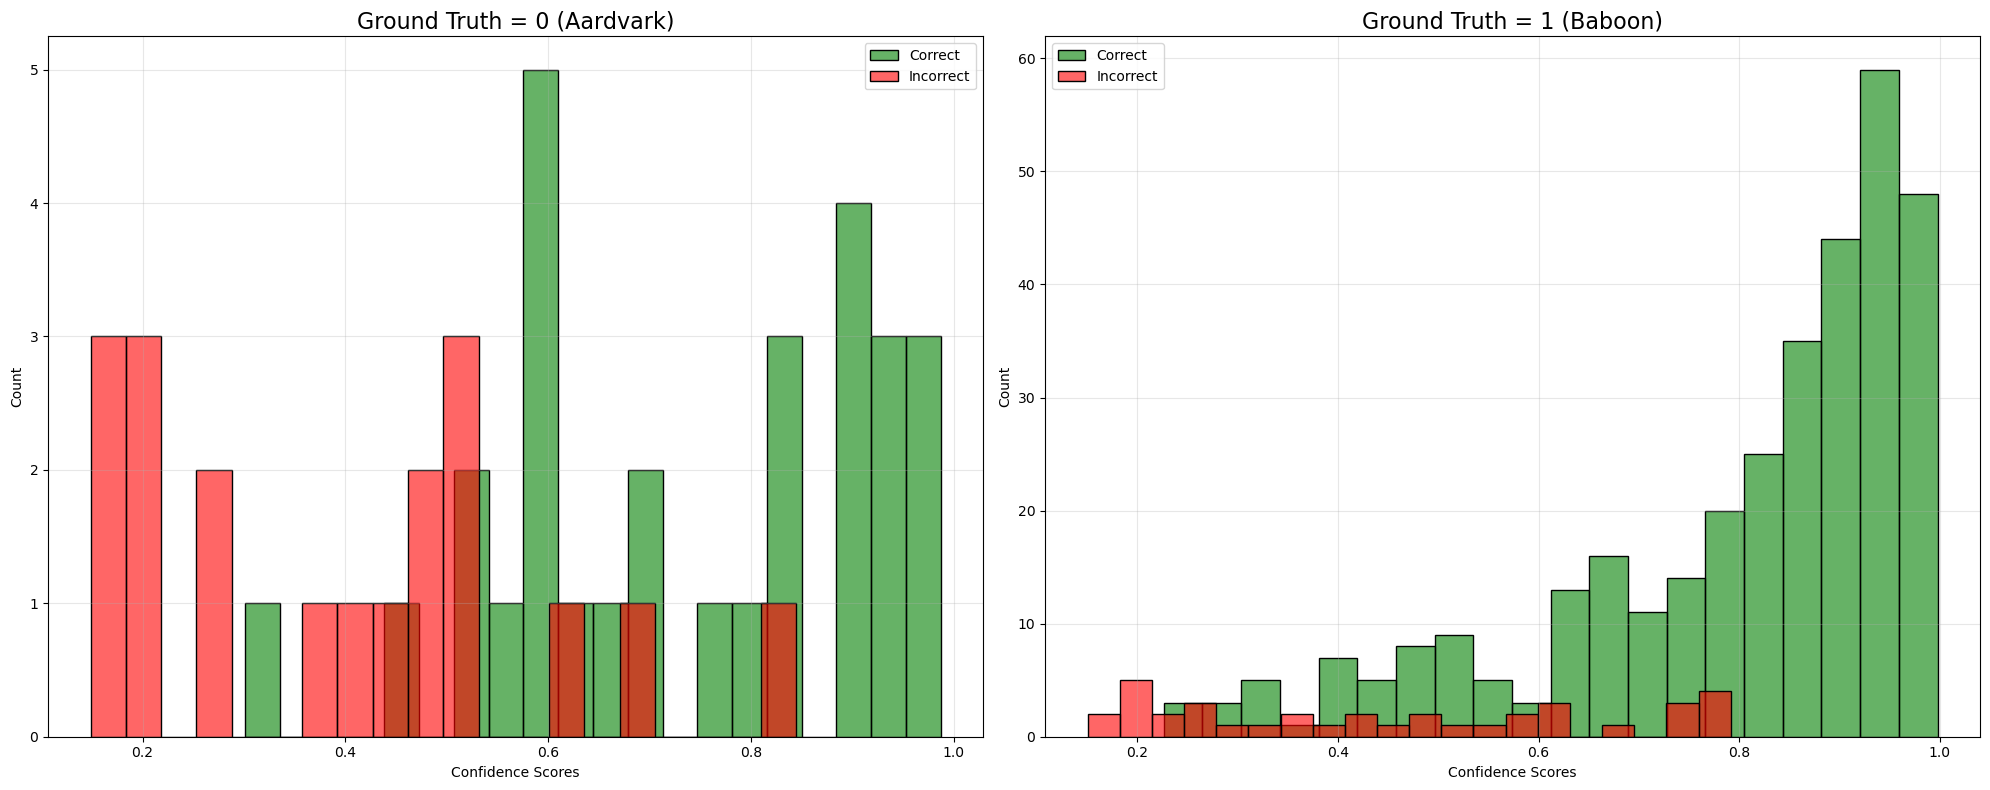

In [40]:
#what about absolute value histograms? not densities
# Create figure with two panels (1-row, 2-columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Panel 1: ground_truth = 0 [let's try for category 0 - baboons - just to start]
data_gt0 = df[df['true'] == 0]
correct_gt0 = data_gt0[data_gt0['true'] == data_gt0['pred']]['conf']
incorrect_gt0 = data_gt0[data_gt0['true'] != data_gt0['pred']]['conf']
sns.histplot(data=correct_gt0, bins=20, kde=False, color='g', alpha=0.6, label='Correct', ax=ax1)
sns.histplot(data=incorrect_gt0, bins=20, kde=False, color='r', alpha=0.6, label='Incorrect', ax=ax1)
ax1.set_title('Ground Truth = 0 (Aardvark)', fontsize=16)
ax1.set_xlabel('Confidence Scores')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)
ax1.legend()

#  Panel 2: ground_truth = 1 [and let's try for category 1 just to start]
data_gt1 = df[df['true'] == 1]
correct_gt1 = data_gt1[data_gt1['true'] == data_gt1['pred']]['conf']
incorrect_gt1 = data_gt1[data_gt1['true'] != data_gt1['pred']]['conf']
sns.histplot(data=correct_gt1, bins=20, kde=False, color='g', alpha=0.6, label='Correct', ax=ax2)
sns.histplot(data=incorrect_gt1, bins=20, kde=False, color='r', alpha=0.6, label='Incorrect', ax=ax2)
ax2.set_title('Ground Truth = 1 (Baboon)', fontsize=16)
ax2.set_xlabel('Confidence Scores')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.show()

fig.savefig(f'{root_path}/count_hist_finegraintogrouped.png')  # You can change the file format to .pdf, .jpg, etc.

#task: run through all classes with a for loop
#save each individual plot as a file

In [5]:
#what about a figure for every category...let's try

# Directory to save the plots
output_dir = f'{root_path}/confidence_plots_finegraintogrouped'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Number of categories
num_categories = 28

# Set the grid size for the subplots (you can adjust this as needed)
ncols = 5  # Number of columns
nrows = int(np.ceil(num_categories / ncols))  # Number of rows, based on number of categories

# Loop through each category (0 to 50)
for category in species_list_grouped:
    # Filter data for the current category

    data_category = df[df['true_label'] == category]
    
    # Get the confidence scores for correct and incorrect predictions
    correct_category = data_category[data_category['true_label'] == data_category['pred_label']]['conf']
    incorrect_category = data_category[data_category['true_label'] != data_category['pred_label']]['conf']
    
    # Create a new figure for each category
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

    # Plot histograms for correct and incorrect predictions
    sns.histplot(data=correct_category, bins=20, kde=False, color='g', alpha=0.6, label='Correct', ax=ax)
    sns.histplot(data=incorrect_category, bins=20, kde=False, color='r', alpha=0.6, label='Incorrect', ax=ax)
    
    ax.set_title(f'Category {category}', fontsize=14)
    ax.set_xlabel('Confidence Scores')
    ax.set_ylabel('Count')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Save the plot to a file
    plot_filename = f"category_{category}_confidence_plot_finegraintogrouped.png"  # Change format as needed (e.g., .pdf)
    plot_filepath = os.path.join(output_dir, plot_filename)
    fig.savefig(plot_filepath)

    # Close the figure to free up memory
    plt.close(fig)

print("Plots saved successfully!")

Plots saved successfully!


In [36]:
#and I'm interested in a classification report
#this is code from Peter, I'm not sure where to break it up
# import csv for reading CSV files

#we ran this code above already

# print(df.head())

# # read in results
# df = pd.read_csv(f'{root_path}/results.csv')

# # Load the JSON file
# with open('/Users/peter/Downloads/cis_val_annotations.json', 'r') as file:
#     data = json.load(file)
# id_cat_dict = {}
# for category in data.get('categories'):
#     id_cat_dict[category['id']] = category['name']
# print(f"id_cat_dict : {id_cat_dict}")
    
# # Adding new columns with mapped labels
# #this has category names instead of index, with predicted and true values
# df['pred_label'] = df['pred'].map(id_cat_dict)
# df['true_label'] = df['true'].map(id_cat_dict)


# print("df.head()")
# print(df.head())

ValueError: `dataset` input should have multiple elements.

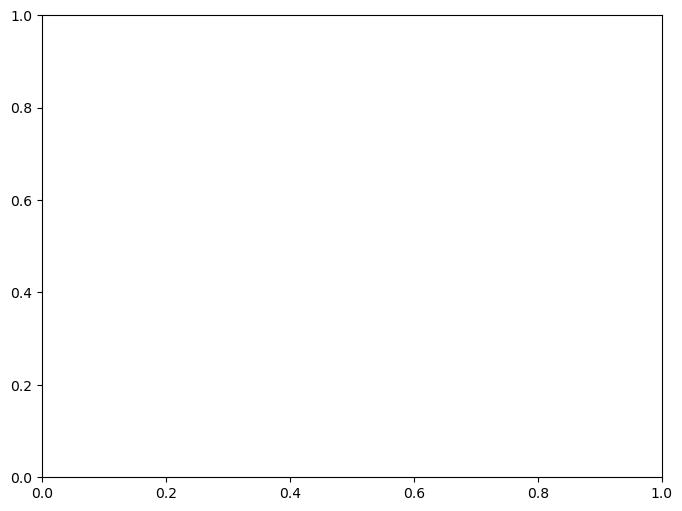

In [ ]:
#code chunk 2/3 from Peter
# Calculate logits
df["logits"] = np.log(df["conf"] / (1 - df["conf"]))

# Classify as positive or negative
df["label"] = np.where(df["pred"] == df["true"], "Positive", "Negative")

# choose class
chosen_class = "bushbaby"
filtered_df = df[df["true_label"] == chosen_class]
# Plot histogram for the first class
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x="logits", hue="label", kde=True, multiple="stack", bins=10)
plt.title(f"Logit Distribution for Class {chosen_class}")
plt.xlabel("Logits")
plt.ylabel("Frequency")
plt.show()
plt.savefig(f'{root_path}/logits_hist_finegraintogrouped.png')  # You can change the file format to .pdf, .jpg, etc.

# Plot histogram for the first class
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x="conf", hue="label", kde=True, multiple="stack", bins=10)
plt.title(f"Confidence Distribution for Class {chosen_class}")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()
plt.savefig(f'{root_path}/confidence_hist_finegraintogrouped.png')  # You can change the file format to .pdf, .jpg, etc.

In [38]:
#code chunk 3/3 from Peter for a classification report
from sklearn.metrics import classification_report

# Get unique class IDs in the dataset
unique_labels = sorted(df["true"].unique())

# Generate target names for only the present class IDs
target_names = [id_cat_dict[label] for label in unique_labels]

# Generate classification report
y_true = df["true"]
y_pred = df["pred"]

report = classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names)
# print(report)

#export as csv file

#I think I need to save it as a dictionary first
# Get the classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
# print(report_dict)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()  # Transpose to make it easier to read

# Save the DataFrame as a CSV file
report_df.to_csv(f'{root_path}/classification_report.csv', index=True)
# report_df.to_csv(f'/mnt/c/', index=True)

# Print the DataFrame (optional, for visual verification)
print(report_df)

                          precision    recall  f1-score      support
aardvark                   0.783784  0.604167  0.682353    48.000000
primate                    0.834835  0.868750  0.851455   320.000000
bird                       0.872897  0.860037  0.866419   543.000000
hippo_buffalo_wildebeest   0.357895  0.531250  0.427673    64.000000
bushbuck                   0.387387  0.563319  0.459075   229.000000
pig                        0.673913  0.770186  0.718841   322.000000
civet                      0.906250  0.973154  0.938511   149.000000
duiker_spp                 0.818713  0.620843  0.706179   451.000000
eland_hartebeest           0.796020  0.640000  0.709534   250.000000
elephant                   0.908555  0.855556  0.881259   360.000000
genet                      0.879845  0.965957  0.920892   235.000000
hare                       0.283019  0.937500  0.434783    16.000000
honey_badger               0.916667  0.647059  0.758621    34.000000
impala                     0.72407

/home/Kathryn/miniconda3/envs/cv4ecology/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/Kathryn/miniconda3/envs/cv4ecology/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/Kathryn/miniconda3/envs/cv4ecology/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [39]:
# #this is how Talen made df_combined
# import pandas as pd
# import numpy
# # Convert lists to numpy arrays for consistent handling
# # confidence_scores = np.array(confidence_scores)
# argmax_all = np.array(argmax_all)
# gt_all = np.array(gt_all)
# # Create DataFrame with all components
# df_combined = pd.DataFrame({
#     # 'confidence_scores': confidence_scores.tolist(),  # Convert to list for DataFrame
#     'predict_class': argmax_all,
#     'ground_truth': gt_all,
#     'image_id': range(len(img_list)),
#     'filenames':np.array(filenames),
#     'confs':confs_list
# })
# # Set image_id as index
# df_combined.set_index('image_id', inplace=True)
# # Verify structure
# print("DataFrame shape:", df_combined.shape)
# print("\nFirst few rows:")
# print(df_combined.head())

#so this seems like my df too? I think?